# FFT with Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
#maxt=100  #even
maxt=10   #odd
dt=1

fq1=2/(maxt*dt)
fq2=10/(maxt*dt)

ttt=np.arange(0,maxt,1)
sin1=np.sin(fq1*2*np.pi*ttt)
sin2=np.sin(fq2*2*np.pi*ttt)
tot=sin1+sin2

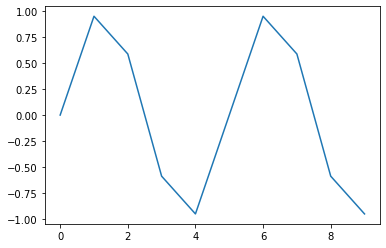

In [48]:
plt.plot(ttt,tot)

In [4]:
fc=np.fft.fft(tot)
fq=np.fft.fftfreq(ttt.shape[-1])/dt
fc_amp=fc.real*fc.real+fc.imag*fc.imag

(-12, 12)

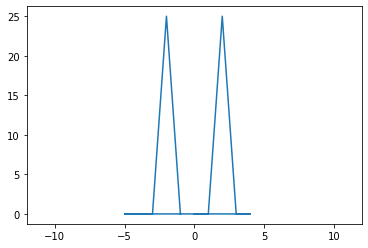

In [5]:
plt.plot(fq*len(tot),fc_amp)
plt.xlim(-12,12)

In [53]:
fq[0]
#fq[1]*len(tot)
#fq[49]*len(tot)
#fq[50]*len(tot)
#fq[51]*len(tot)

0.0

In [6]:
fc_shift=np.fft.fftshift(fc_amp)
fq_shift=np.fft.fftshift(fq)

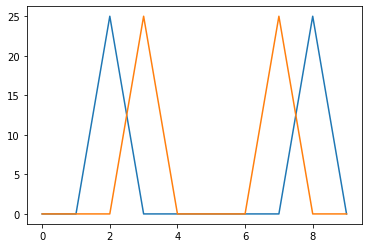

In [7]:
plt.plot(fc_amp)
plt.plot(fc_shift)